<a href="https://colab.research.google.com/github/Bedadeepa/MachineLearning_algo_Supervised/blob/main/Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Import Libraries
---



In [ ]:



## A. Data manipulation

# 1.1 Call data manipulation libraries
import pandas as pd
import numpy as np



# import required libraries Regression 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.inspection import permutation_importance


#  BoxCox transformations:

from sklearn.preprocessing import PowerTransformer     # BoxCox transformation

##  Data preprocessing

# Scaling data in various manner
from sklearn.preprocessing import StandardScaler


#  For encoding target class values
from sklearn.preprocessing import LabelEncoder

#  Splitting data
from sklearn.model_selection import train_test_split                # Returns split data
#Pipelines
from sklearn.pipeline import make_pipeline


# Modeling

from sklearn.utils.class_weight import compute_class_weight

from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.ensemble import ExtraTreesClassifier


#  Performance metrics
from sklearn.metrics import  confusion_matrix,log_loss
#Model evaluation metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,f1_score
from sklearn.metrics import median_absolute_error,explained_variance_score


##  Others
#  Misc/visualization
import os, time, gc
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from datetime import datetime
from matplotlib import dates

In [ ]:
# 1.11 Display multiple commands output from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# Mount gdrive
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).



#Read Data

In [ ]:
# 2.0 Set datafile path
path = "/gdrive/MyDrive/Colab_data_file/Walmart_sales_data/"
os.chdir(path)

#Data Exploration and Reduce Memory

In [ ]:
data=pd.read_csv("/gdrive/MyDrive/Colab_data_file/Walmart_sales_data/archive.zip")

In [ ]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
df=data.copy()

In [ ]:
data.shape
print()
data.columns


(6435, 8)

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [ ]:

data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
data.isnull().sum()            
print("\n----------")
data.isnull().sum().sum()      
print("\n------------")
data.duplicated().sum() 

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


----------


0


------------


0

In [ ]:
#summary of dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
#Checking if a feature is categorical
(data.nunique()<5).sum()

1


#Feature Engineering

**Data Preparation**

In [ ]:
# I will create categories for the sales data
# All sales below 1,000,000 will be 'Low', those between 1,000,000 and 2,000,000 will be 'Moderate' and those 
# above 2,000,000 will be 'High'

data['category'] = np.where(data['Weekly_Sales']<10, 'Low', 
                          (np.where(data['Weekly_Sales']<=20, 'Moderate', 'High')))
data.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,category
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,High
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,High
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,High
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,High
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,High
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106,High
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106,High
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106,High
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808,High
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808,High


In [ ]:

# Splitting Date and create new columns (Day, Month, and Year)
data["Day"]= pd.DatetimeIndex(data['Date']).day
data["week"]= pd.DatetimeIndex(data['Date']).day
data['Month'] = pd.DatetimeIndex(data['Date']).month
data['Year'] = pd.DatetimeIndex(data['Date']).year
data


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,category,Day,week,Month,Year
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,High,2,2,5,2010
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,High,2,2,12,2010
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,High,19,19,2,2010
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,High,26,26,2,2010
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,High,3,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,High,28,28,9,2012
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,High,10,10,5,2012
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,High,10,10,12,2012
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,High,19,19,10,2012


In [ ]:
# Convert date to datetime format and show dataset information
data['Date'] =  pd.to_datetime(data['Date'])
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   category      6435 non-null   object        
 9   Day           6435 non-null   int64         
 10  week          6435 non-null   int64         
 11  Month         6435 non-null   int64         
 12  Year          6435 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(6), object(1)
memory usage: 653.7+ KB


#Data Visualisation

**Q1: Which store has minimum and maximum sales?**

<class 'numpy.float64'>


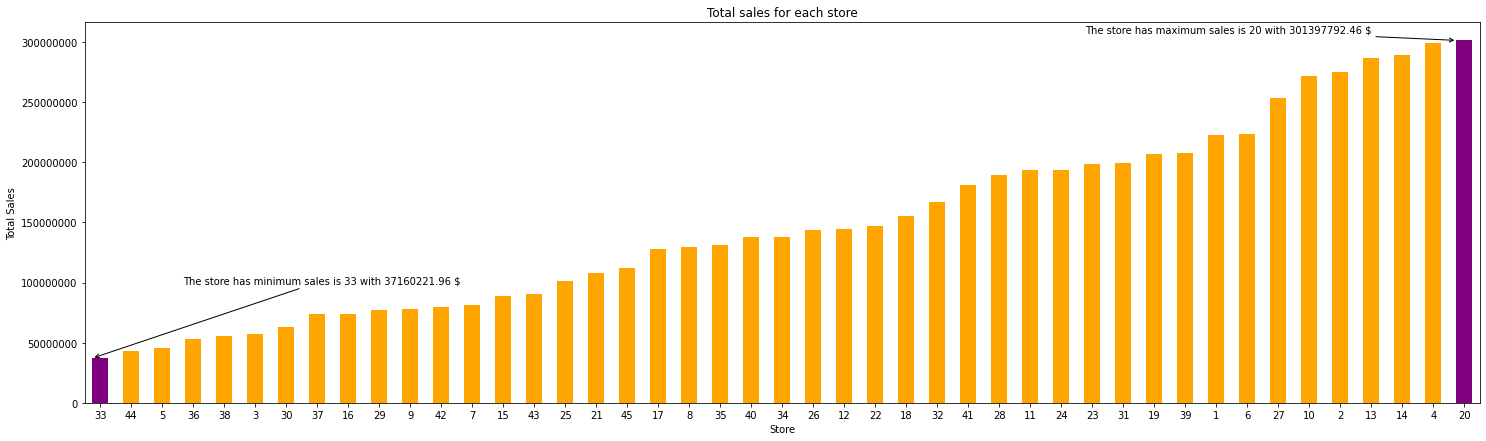

In [ ]:
plt.figure(figsize=(25,7))

# Sum Weekly_Sales for each store, then sortded by total sales
total_sales_for_each_store = data.groupby('Store')['Weekly_Sales'].sum().sort_values() 
total_sales_for_each_store_array = np.array(total_sales_for_each_store) # convert to array

# Assigning a specific color for the stores have the lowest and highest sales
clrs = ['orange' if ((x < max(total_sales_for_each_store_array)) and (x > min(total_sales_for_each_store_array))) else 'purple' for x in total_sales_for_each_store_array]


ax = total_sales_for_each_store.plot(kind='bar',color=clrs);

# store have minimum sales
p = ax.patches[0]
print(type(p.get_height()))
ax.annotate("The store has minimum sales is 33 with {0:.2f} $".format((p.get_height())), xy=(p.get_x(), p.get_height()), xycoords='data',
            xytext=(0.17, 0.32), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='center', verticalalignment='center')


# store have maximum sales 
p = ax.patches[44]
ax.annotate("The store has maximum sales is 20 with {0:.2f} $".format((p.get_height())), xy=(p.get_x(), p.get_height()), xycoords='data',
            xytext=(0.82, 0.98), textcoords='axes fraction',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"),
            horizontalalignment='center', verticalalignment='center')


# plot properties
plt.xticks(rotation=0)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')
plt.title('Total sales for each store')
plt.xlabel('Store')
plt.ylabel('Total Sales');

**Q2: Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation?**

In [ ]:
# Which store has maximum standard deviation
data_std = pd.DataFrame(data.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False))
print("The store has maximum standard deviation is "+str(data_std.head(1).index[0])+" with {0:.0f} $".format(data_std.head(1).Weekly_Sales[data_std.head(1).index[0]]))


The store has maximum standard deviation is 14 with 317570 $


<Figure size 1080x504 with 0 Axes>

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'The Sales Distribution of Store #14')

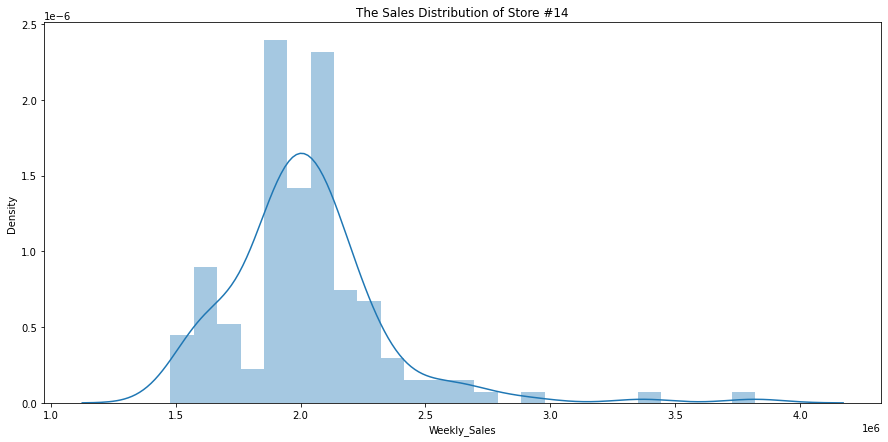

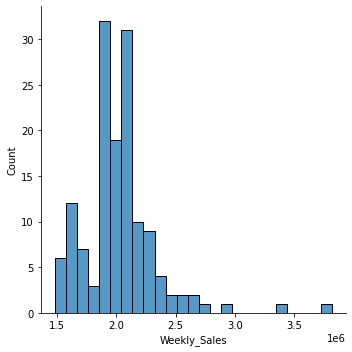

In [ ]:
# Distribution of store has maximum standard deviation
plt.figure(figsize=(15,7))
sns.distplot(data[data['Store'] == data_std.head(1).index[0]]['Weekly_Sales'])
plt.title('The Sales Distribution of Store #'+ str(data_std.head(1).index[0]));
sns.displot(data[data['Store'] == data_std.head(1).index[0]]['Weekly_Sales'])

In [ ]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,category,Day,week,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,High,2,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,High,2,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,High,19,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,High,26,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,High,3,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,High,28,28,9,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,High,10,10,5,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,High,10,10,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,High,19,19,10,2012


In [ ]:
# Coefficient of mean to standard deviation
coef_mean_std = pd.DataFrame(data.groupby('Store')['Weekly_Sales'].std() / data.groupby('Store')['Weekly_Sales'].mean())
coef_mean_std = coef_mean_std.rename(columns={'Weekly_Sales':'Coefficient of mean to standard deviation'})
coef_mean_std

,Coefficient of mean to standard deviation
Store,
1,0.100292
2,0.123424
3,0.115021
4,0.127083
5,0.118668
6,0.135823
7,0.197305
8,0.116953
9,0.126895


<Figure size 1080x504 with 0 Axes>

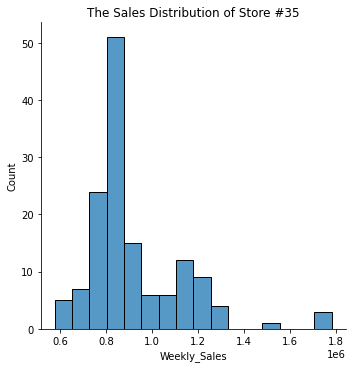

In [ ]:
# Distribution of store has maximum coefficient of mean to standard deviation
coef_mean_std_max = coef_mean_std.sort_values(by='Coefficient of mean to standard deviation')
plt.figure(figsize=(15,7))
sns.displot(data[data['Store'] == coef_mean_std_max.tail(1).index[0]]['Weekly_Sales'])
plt.title('The Sales Distribution of Store #'+str(coef_mean_std_max.tail(1).index[0]));


**Q3: Which store/s has good quarterly growth rate in Q3’2012**


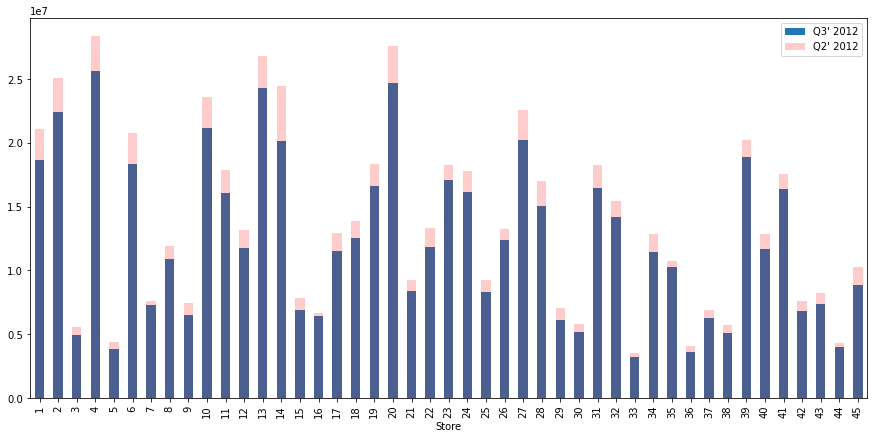

In [ ]:
plt.figure(figsize=(15,7))

# Sales for third quarterly in 2012
Q3 = data[(data['Date'] > '2012-07-01') & (data['Date'] < '2012-09-30')].groupby('Store')['Weekly_Sales'].sum()

# Sales for second quarterly in 2012
Q2 = data[(data['Date'] > '2012-04-01') & (data['Date'] < '2012-06-30')].groupby('Store')['Weekly_Sales'].sum()

# Plotting the difference between sales for second and third quarterly
Q2.plot(ax=Q3.plot(kind='bar',legend=True),kind='bar',color='r',alpha=0.2,legend=True);
plt.legend(["Q3' 2012", "Q2' 2012"]);


In [ ]:
#  store/s has good quarterly growth rate in Q3’2012 - .sort_values(by='Weekly_Sales')
print('Store have good quarterly growth rate in Q3’2012 is Store '+str(Q3.idxmax())+' With '+str(Q3.max())+' $')

Store have good quarterly growth rate in Q3’2012 is Store 4 With 25652119.35 $


**Q4: Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together**

Holiday Events:


1.   Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
2.   Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
3.   Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
4.   Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13





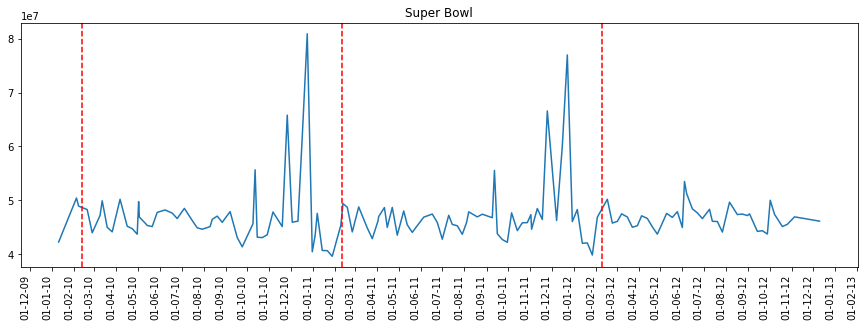

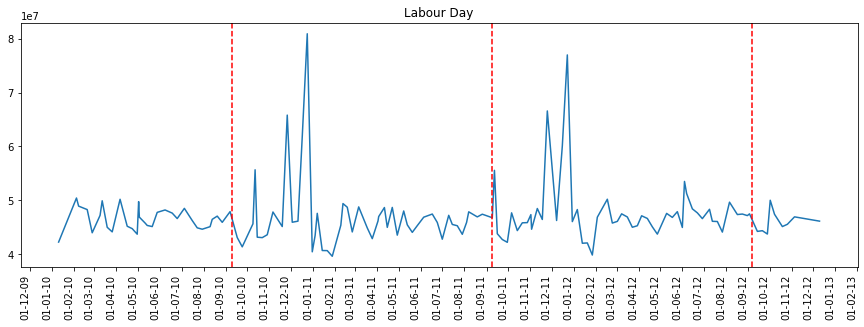

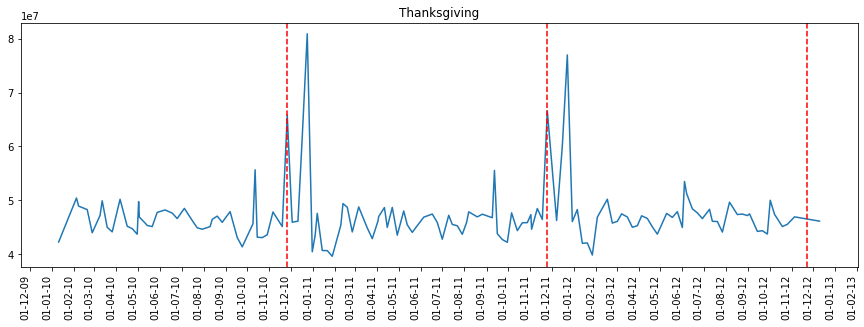

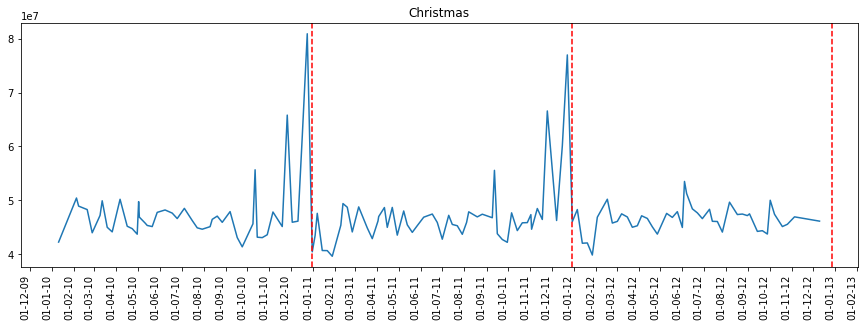

In [ ]:
def plot_line(df,holiday_dates,holiday_label):
    fig, ax = plt.subplots(figsize = (15,5))  
    ax.plot(df['Date'],df['Weekly_Sales'],label=holiday_label)
    
    for day in holiday_dates:
        day = datetime.strptime(day, '%d-%m-%Y')
        plt.axvline(x=day, linestyle='--', c='r')
    

    plt.title(holiday_label)
    x_dates = df['Date'].dt.strftime('%Y-%m-%d').sort_values().unique()
    xfmt = dates.DateFormatter('%d-%m-%y')
    ax.xaxis.set_major_formatter(xfmt)
    ax.xaxis.set_major_locator(dates.DayLocator(1))
    plt.gcf().autofmt_xdate(rotation=90)
    plt.show()


total_sales = data.groupby('Date')['Weekly_Sales'].sum().reset_index()
Super_Bowl =['12-2-2010', '11-2-2011', '10-2-2012']
Labour_Day =  ['10-9-2010', '9-9-2011', '7-9-2012']
Thanksgiving =  ['26-11-2010', '25-11-2011', '23-11-2012']
Christmas = ['31-12-2010', '30-12-2011', '28-12-2012']
    
plot_line(total_sales,Super_Bowl,'Super Bowl')
plot_line(total_sales,Labour_Day,'Labour Day')
plot_line(total_sales,Thanksgiving,'Thanksgiving')
plot_line(total_sales,Christmas,'Christmas')

The sales increased during thanksgiving. And the sales decreased during christmas.

In [ ]:
data.loc[data.Date.isin(Super_Bowl)]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,category,Day,week,Month,Year
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,High,2,2,12,2010
53,1,2011-11-02,1649614.93,1,36.39,3.022,212.936705,7.742,High,2,2,11,2011
105,1,2012-10-02,1802477.43,1,48.02,3.409,220.265178,7.348,High,2,2,10,2012
144,2,2010-12-02,2137809.50,1,38.49,2.548,210.897994,8.324,High,2,2,12,2010
196,2,2011-11-02,2168041.61,1,33.19,3.022,212.592862,8.028,High,2,2,11,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6202,44,2011-11-02,307486.73,1,30.83,3.034,127.859129,7.224,High,2,2,11,2011
6254,44,2012-10-02,325377.97,1,33.73,3.116,130.384903,5.774,High,2,2,10,2012
6293,45,2010-12-02,656988.64,1,27.73,2.773,181.982317,8.992,High,2,2,12,2010
6345,45,2011-11-02,766456.00,1,30.30,3.239,183.701613,8.549,High,2,2,11,2011


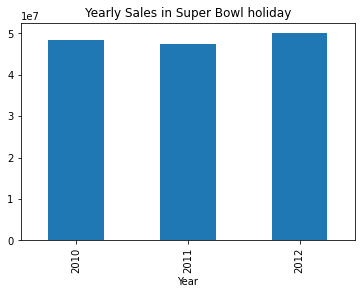

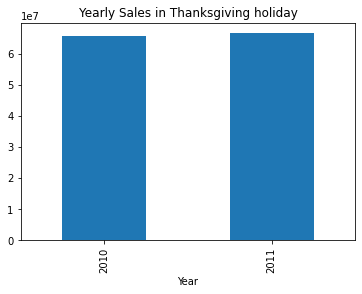

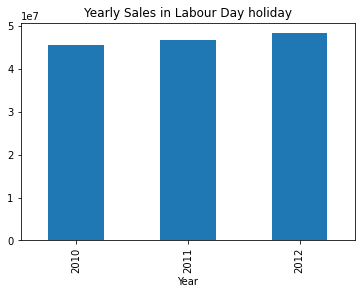

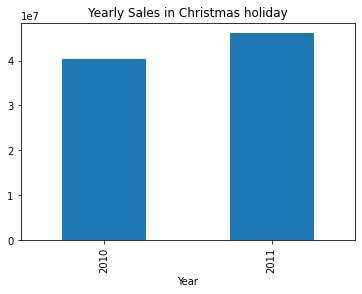

In [ ]:
# Yearly Sales in holidays
Super_Bowl_df = pd.DataFrame(data.loc[data.Date.isin(Super_Bowl)].groupby('Year')['Weekly_Sales'].sum())
Thanksgiving_df = pd.DataFrame(data.loc[data.Date.isin(Thanksgiving)].groupby('Year')['Weekly_Sales'].sum())
Labour_Day_df = pd.DataFrame(data.loc[data.Date.isin(Labour_Day)].groupby('Year')['Weekly_Sales'].sum())
Christmas_df = pd.DataFrame(data.loc[data.Date.isin(Christmas)].groupby('Year')['Weekly_Sales'].sum())

Super_Bowl_df.plot(kind='bar',legend=False,title='Yearly Sales in Super Bowl holiday') 
Thanksgiving_df.plot(kind='bar',legend=False,title='Yearly Sales in Thanksgiving holiday') 
Labour_Day_df.plot(kind='bar',legend=False,title='Yearly Sales in Labour Day holiday')
Christmas_df.plot(kind='bar',legend=False,title='Yearly Sales in Christmas holiday')


**Q5: Provide a monthly and semester view of sales in units and give insights**

In [ ]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,category,Day,week,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,High,2,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,High,2,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,High,19,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,High,26,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,High,3,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,High,28,28,9,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,High,10,10,5,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,High,10,10,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,High,19,19,10,2012


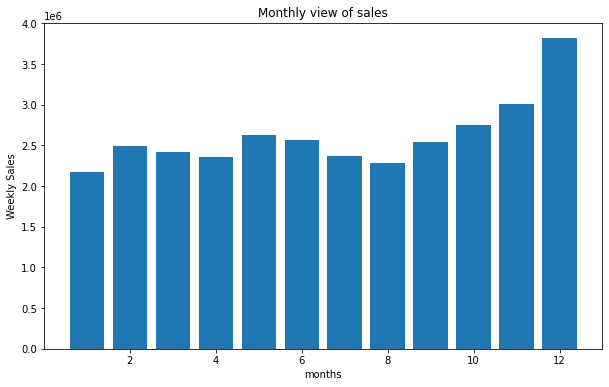

In [ ]:
# Monthly view of sales for all years
plt.figure(figsize=(10,6))
plt.bar(data["Month"],data["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales");

<Figure size 720x432 with 0 Axes>

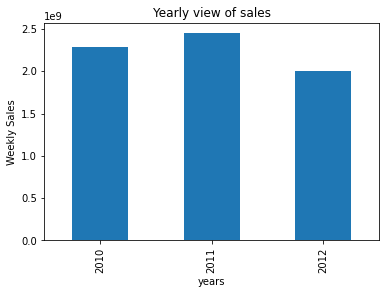

In [ ]:
# Yearly view of sales
plt.figure(figsize=(10,6))
data.groupby("Year")[["Weekly_Sales"]].sum().plot(kind='bar',legend=False)
plt.xlabel("years")
plt.ylabel("Weekly Sales")
plt.title("Yearly view of sales");

**Q6. show the relation between the feature**

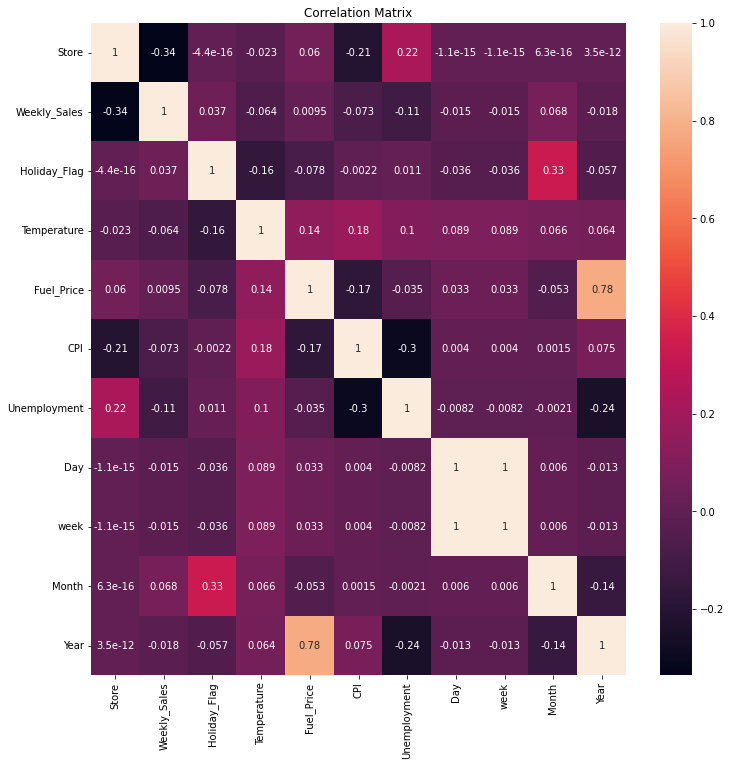

In [ ]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),annot=True)
plt.title('Correlation Matrix');

**Q7: Distribution of each Feature**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


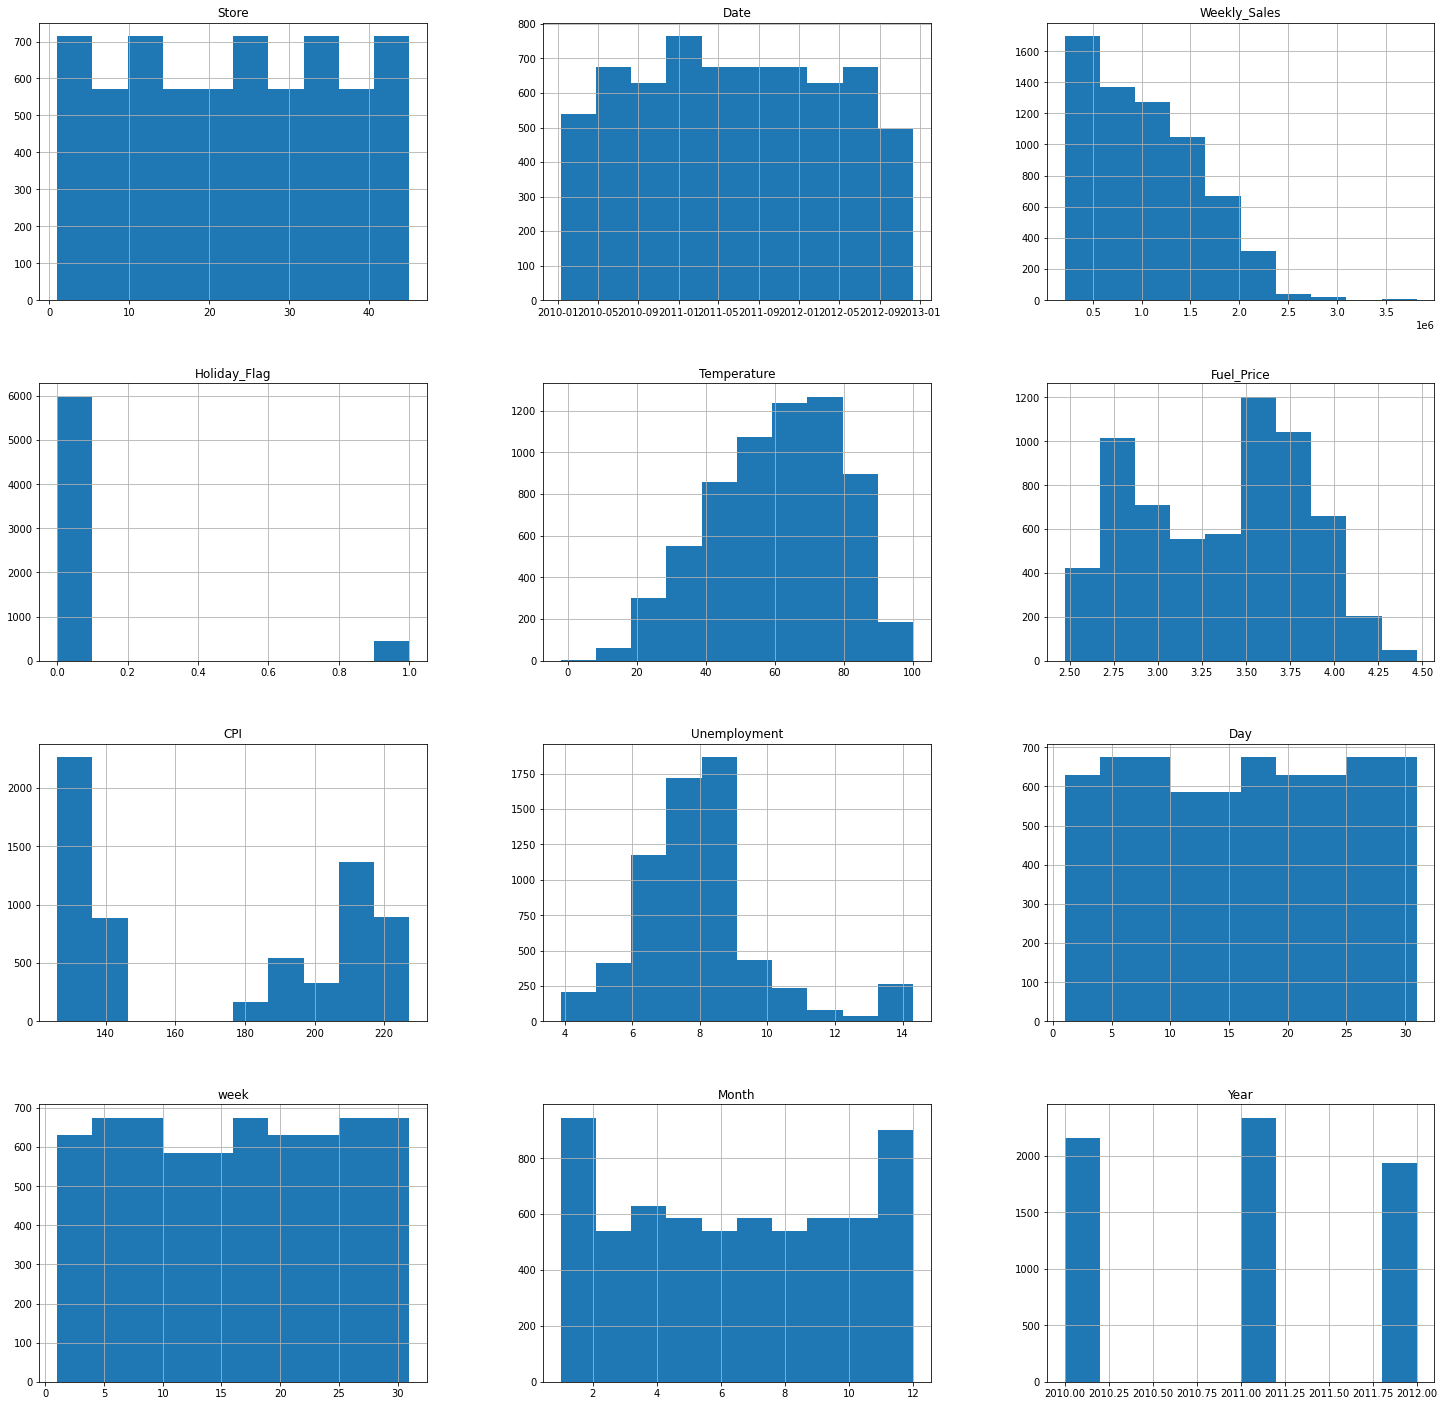

In [ ]:
fig = plt.figure(figsize=(25,25));
ax = fig.gca()
data.hist(ax=ax)
plt.tight_layout;

Q.8: want to see percentages of store types?

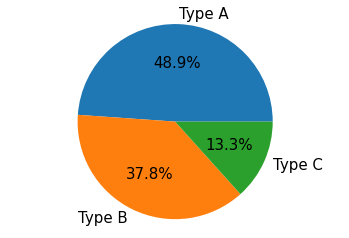

In [ ]:
data1 = [48.88, 37.77 , 13.33 ]  #percentages
my_labels = 'Type A','Type B', 'Type C' # labels
plt.pie(data1,labels=my_labels,autopct='%1.1f%%', textprops={'fontsize': 15}) #plot pie type and bigger the labels
plt.axis('equal')
mpl.rcParams.update({'font.size': 20}) #bigger percentage labels

plt.show();


#RandomForest Regression


##Preparing & spliting model data


In [ ]:
data

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,category,Day,week,Month,Year
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,High,2,2,5,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,High,2,2,12,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,High,19,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,High,26,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,High,3,3,5,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,High,28,28,9,2012
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,High,10,10,5,2012
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,High,10,10,12,2012
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,High,19,19,10,2012


In [ ]:
#Defining the featurematrix(x) and response vector(y)
X=data.drop(columns=['Weekly_Sales', 'Year', 'Month', 'Day', 'CPI' ])
y=data.iloc[:, 1:2]

In [ ]:
#we can split X and y into traininig and test sets. we will use 70% training and 30% test data
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3)

Model creation and fitting training data

In [ ]:
#RandomForest object initialized 
rf_obj=RandomForestRegressor(n_estimators = 100, random_state = 0)
rf_obj.fit(X_train,np.ravel(y_train))

TypeError: ignored

In [ ]:
X = data[['Store','Fuel_Price','CPI','Unemployment','Day','Month','Year']]
y = data['Weekly_Sales']

# Split data to train and test (0.80:0.20)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)


##Model creation and fitting training data

In [ ]:
#RandomForest object initialized 
rf_obj=RandomForestRegressor(n_estimators = 100, random_state = 0)
rf_obj.fit(X_train,np.ravel(y_train))

TypeError: ignored

Predicting the sales data

In [ ]:
#The RF module predicts the data
y_pred=rf_obj.predict(X_test)
y_pred

array([ 529534.659 ,  989808.6687, 1435785.3947, ..., 1026367.0402,
        412589.4257, 1978118.3407])

## ** Model Performance**

In [ ]:
print(" \n The training score is: \n", round(rf_obj.score(X_train, y_train), 2))

 
 The training score is: 
 0.99


In [ ]:
#Showing the evaluation of module and error score
print("\n RandomForestRegression model performance: \n")
print("R2 score =", round(r2_score(y_test, y_pred), 3))
print("Mean absolute error(MAE) =", round(mean_absolute_error(y_test, 
y_pred), 3))
print("Median absolute error =", round(median_absolute_error(y_test, 
y_pred), 3)) 

print("Mean squared error(MSE) =", round(mean_squared_error(y_test, 
y_pred), 3)) 
print("Explain variance score =", round(explained_variance_score(y_test, 
y_pred), 3))


 RandomForestRegression model performance: 

R2 score = 0.959
Mean absolute error(MAE) = 64019.264
Median absolute error = 34329.27
Mean squared error(MSE) = 13194640831.393
Explain variance score = 0.959


From this we can conclude that

*   The Explained variance score is close to 92%
*   The Mean squared error is high.
*  The R2 score is close to 92%
*   Model is not overfitting




In [ ]:
X_test = data[['Store','Fuel_Price','CPI','Unemployment','Day','Month','Year']]
#predict = rf.predict(X_test);
y_pred=rf_obj.predict(X_test)


In [ ]:
len(X_test)


6435

In [ ]:
print(" \n The training score is: \n", round(rf_obj.score(X_train, y_train), 2))
 

 
 The training score is: 
 0.99


##Plot to check the MSE and estimators

In [ ]:
#took the 100 trees and combining the MSE
train_results = []
test_results = []
list_nb_trees = [5, 10, 15, 30, 45, 60, 80, 100]

for nb_trees in list_nb_trees:
    rf = RandomForestRegressor(n_estimators=nb_trees)
    rf.fit(X_train, np.ravel(y_train))

    train_results.append(mean_squared_error(y_train, rf.predict(X_train)))
    test_results.append(mean_squared_error(y_test, rf.predict(X_test)))

plt.subplots(figsize=(12,5))
plt.plot(list_nb_trees, train_results, color="r", linestyle='-', label="Training Score")
plt.plot(list_nb_trees, test_results, color="g", linestyle='-', label="Testing Score")
plt.title("Red:Training Green:Testing")
plt.ylabel('MSE')
plt.xlabel('n_estimators')
plt.show();

ValueError: ignored



##Feature Importance



In [ ]:
reg_feature_imp = pd.Series(rf_obj.feature_importances_,
                        index = X_train.columns).sort_values(ascending=False)
reg_feature_imp*100
reg_feature_imp.reset_index()

As per this data ,Store has 66% which is highest feature importances 

In [ ]:
#Displaying the feature importances in plot
plt.subplots(figsize=(18,9))
plt.plot(reg_feature_imp)
plt.xlabel("X-Variable Scores")
plt.ylabel("Y-Variables")
plt.title("Feature Importance")
plt.show()


In [ ]:
sns.barplot(x= regimp*100, y = regimp.index);
plt.xlabel("X-Variable Scores");
plt.ylabel("Y-Variables");
plt.title("Feature Importance");

plt.show();

#Pipeline and Model Buiding

In [ ]:
#Creating the pipe line for model
pipe1=make_pipeline(StandardScaler(),RandomForestRegressor(n_estimators=100, max_depth = 35))

In [ ]:
#Training the data to ML module
pipe1.fit(X_train, y_train);
print()
#Predicting the result of sales
prob_pipe1=pipe1.predict(X_test)
prob_pipe1



In [ ]:
#Displaying the score of train data
pipe1.score(X_test,prob_pipe1)

In [ ]:
pipe2 = make_pipeline(
                      StandardScaler(),       
                      PowerTransformer(),
                      RandomForestRegressor(                     
                          n_estimators=200,
                          max_depth = 45,
                          oob_score = True  
                         )
                      )

In [ ]:
#  Train and predict

pipe2.fit(X_train,np.ravel(y_train))
prob_pipe2 = pipe2.predict(X_test)
prob_pipe2.shape   
prob_pipe2

##MSE Calculation

In [ ]:
#Combining the MSE of 100 trees of training data

train_results = []
test_results = []
list_nb_trees = [5, 10, 15, 30, 45, 60, 80, 100]
for nb_trees in list_nb_trees:
    RFpipe1=make_pipeline(StandardScaler(), PowerTransformer(standardize = True),RandomForestRegressor(n_estimators=nb_trees, max_depth = 10))
    RFpipe1.fit(X_train,np.ravel(y_train))

    train_results.append(mean_squared_error(y_train, RFpipe1.predict(X_train)))
    test_results.append(mean_squared_error(predict, RFpipe1.predict(X_test)))

In [ ]:
#The MSE and Training score data

plt.subplots(figsize=(10,6));
plt.plot(list_nb_trees, train_results,  label = "Training score");
plt.plot(list_nb_trees, test_results,  label="Testing Score");
plt.title("The Testing and Traing score");
plt.ylabel('MSE');
plt.xlabel('n_estimators');
plt.show() ;

In [ ]:
# Monthly view of sales for each years
plt.scatter(data[data.Year==2010]["Month"],data[data.Year==2010]["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2010")
plt.show();

plt.scatter(data[data.Year==2011]["Month"],data[data.Year==2011]["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2011")
plt.show();

plt.scatter(data[data.Year==2012]["Month"],data[data.Year==2012]["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2012")
plt.show();
